# Modeling: unifying DataFrames 

Here I'll unify dataframes that will be the input of the models. Data is not treated yet, I'll do that later, prior to creating the model.

Data unified is that about positives, vaccination and ICUs.

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.read_csv('/work/covid-19_ecuador/data/processed/deaths.csv')

,provincia,total,acumuladas,lat,lng,mes,year,poblacion
0,Azuay,327,327,-2.897414,-79.004481,1,2015,NaN
1,Bolívar,57,57,-1.605556,-79.003056,1,2015,NaN
2,Carchi,63,63,0.812180,-77.716330,1,2015,NaN
3,Cañar,87,87,-2.733333,-78.833333,1,2015,NaN
4,Chimborazo,156,156,-1.674347,-78.648294,1,2015,NaN
...,...,...,...,...,...,...,...,...
2035,Santa Elena,62,1629,-2.226700,-80.858300,11,2021,401178.0
2036,Sto. Domingo Tsáchilas,119,2791,-0.254167,-79.171944,11,2021,511151.0
2037,Sucumbíos,21,839,0.084722,-76.882778,11,2021,230503.0
2038,Tungurahua,140,3725,-1.241667,-78.619722,11,2021,590600.0


In [ ]:
df_positives = pd.read_csv('/work/covid-19_ecuador/data/interim/positives.csv')

In [ ]:
df_vaccinated = pd.read_csv('/work/covid-19_ecuador/data/interim/vaccinated.csv')

In [ ]:
df_icu = pd.read_csv('/work/covid-19_ecuador/data/interim/icu.csv')

In [ ]:
df_positives.columns

Index(['created_at', 'provincia', 'poblacion', 'total', 'nuevas', 'lat', 'lng',
       'year', 'month', 'day', 'quarter', 'day_of_week'],
      dtype='object')

In [ ]:
df_vaccinated.columns

Index(['fecha', 'dosis_total', 'primera_dosis', 'segunda_dosis', 'refuerzo',
       'primera_dosis_diff', 'segunda_dosis_diff', 'refuerzo_diff',
       'dosis_total_diff'],
      dtype='object')

In [ ]:
df_icu.columns

Index(['date', '(MSP) UCI Porcentaje Ocupadas',
       '(RPIS) UCI Porcentaje Ocupadas', '(RPC) UCI Porcentaje Ocupadas'],
      dtype='object')

In [ ]:
df_positives.created_at = pd.to_datetime(df_positives.created_at, format='%Y/%m/%d')

In [ ]:
df_vaccinated.fecha = pd.to_datetime(df_vaccinated.fecha, format='%Y/%m/%d')

In [ ]:
df_icu.date = pd.to_datetime(df_icu.date, format='%Y/%m/%d')

In [ ]:
df_positives.rename(columns={'created_at': 'date'}, inplace=True)
df_vaccinated.rename(columns={'fecha': 'date'}, inplace=True)

In [ ]:
df_vaccinated['year'] = df_vaccinated.date.dt.year

In [ ]:
df_icu['year'] = df_icu.date.dt.year

In [ ]:
df_positives['day_of_year'] = df_positives.date.dt.day_of_year
df_vaccinated['day_of_year'] = df_vaccinated.date.dt.day_of_year
df_icu['day_of_year'] = df_icu.date.dt.day_of_year

In [ ]:
grouped_positives = df_positives.groupby(['year', 'day_of_year'])[['nuevas']].sum()

In [ ]:
grouped_vaccinated = df_vaccinated.groupby(['year', 'day_of_year'])[['dosis_total_diff', 'primera_dosis_diff', 'segunda_dosis_diff', 'refuerzo_diff']].sum()

In [ ]:
grouped_icu = df_icu.groupby(['year', 'day_of_year'])[['(MSP) UCI Porcentaje Ocupadas', '(RPIS) UCI Porcentaje Ocupadas', '(RPC) UCI Porcentaje Ocupadas']].sum()

In [ ]:
grouped_positives

nuevas
year day_of_year        
2020 73               23
     74                5
     75               11
     76               21
     77               53
...                  ...
2021 331             478
     332             185
     333              70
     334             463
     335             355

[629 rows x 1 columns]

In [ ]:
grouped_vaccinated

dosis_total_diff  primera_dosis_diff  segunda_dosis_diff  \
year day_of_year                                                             
2021 20                        0.0                 0.0                 0.0   
     21                        0.0                 0.0                 0.0   
     22                      108.0               108.0                 0.0   
     27                     2874.0              2874.0                 0.0   
     35                     3246.0              3246.0                 0.0   
...                            ...                 ...                 ...   
     332                   20929.0              7217.0              8983.0   
     333                  112959.0             30081.0             60501.0   
     334                  113323.0             36006.0             55159.0   
     335                  211563.0             69888.0            111468.0   
     336                  113909.0             27818.0             53537.0   

                  refuerzo_diff  
year day_of_year                 
2021 20                     0.0  
     21                     0.0  
     22                     0.0  
     27                     0.0  
     35                     0.0  
...                         ...  
     332                 4729.0  
     333                22377.0  
     334                22158.0  
     335                18617.0  
     336                44144.0  

[229 rows x 4 columns]

In [ ]:
grouped_icu

(MSP) UCI Porcentaje Ocupadas  \
year day_of_year                                  
2021 182                                      0   
     183                                      0   
     184                                      0   
     185                                      0   
     186                                      0   
...                                         ...   
     338                                     52   
     339                                     50   
     340                                     55   
     341                                     61   
     342                                     55   

                  (RPIS) UCI Porcentaje Ocupadas  \
year day_of_year                                   
2021 182                                       0   
     183                                       0   
     184                                       0   
     185                                       0   
     186                                       0   
...                                          ...   
     338                                      67   
     339                                      68   
     340                                      69   
     341                                      71   
     342                                      70   

                  (RPC) UCI Porcentaje Ocupadas  
year day_of_year                                 
2021 182                                      0  
     183                                      0  
     184                                      0  
     185                                      0  
     186                                      0  
...                                         ...  
     338                                     23  
     339                                     21  
     340                                     20  
     341                                     19  
     342                                     22  

[161 rows x 3 columns]

In [ ]:
df = grouped_positives.merge(grouped_vaccinated, on=['year', 'day_of_year'], how='outer').merge(grouped_icu, on=['year', 'day_of_year'], how='outer')

In [ ]:
sns.set_theme()

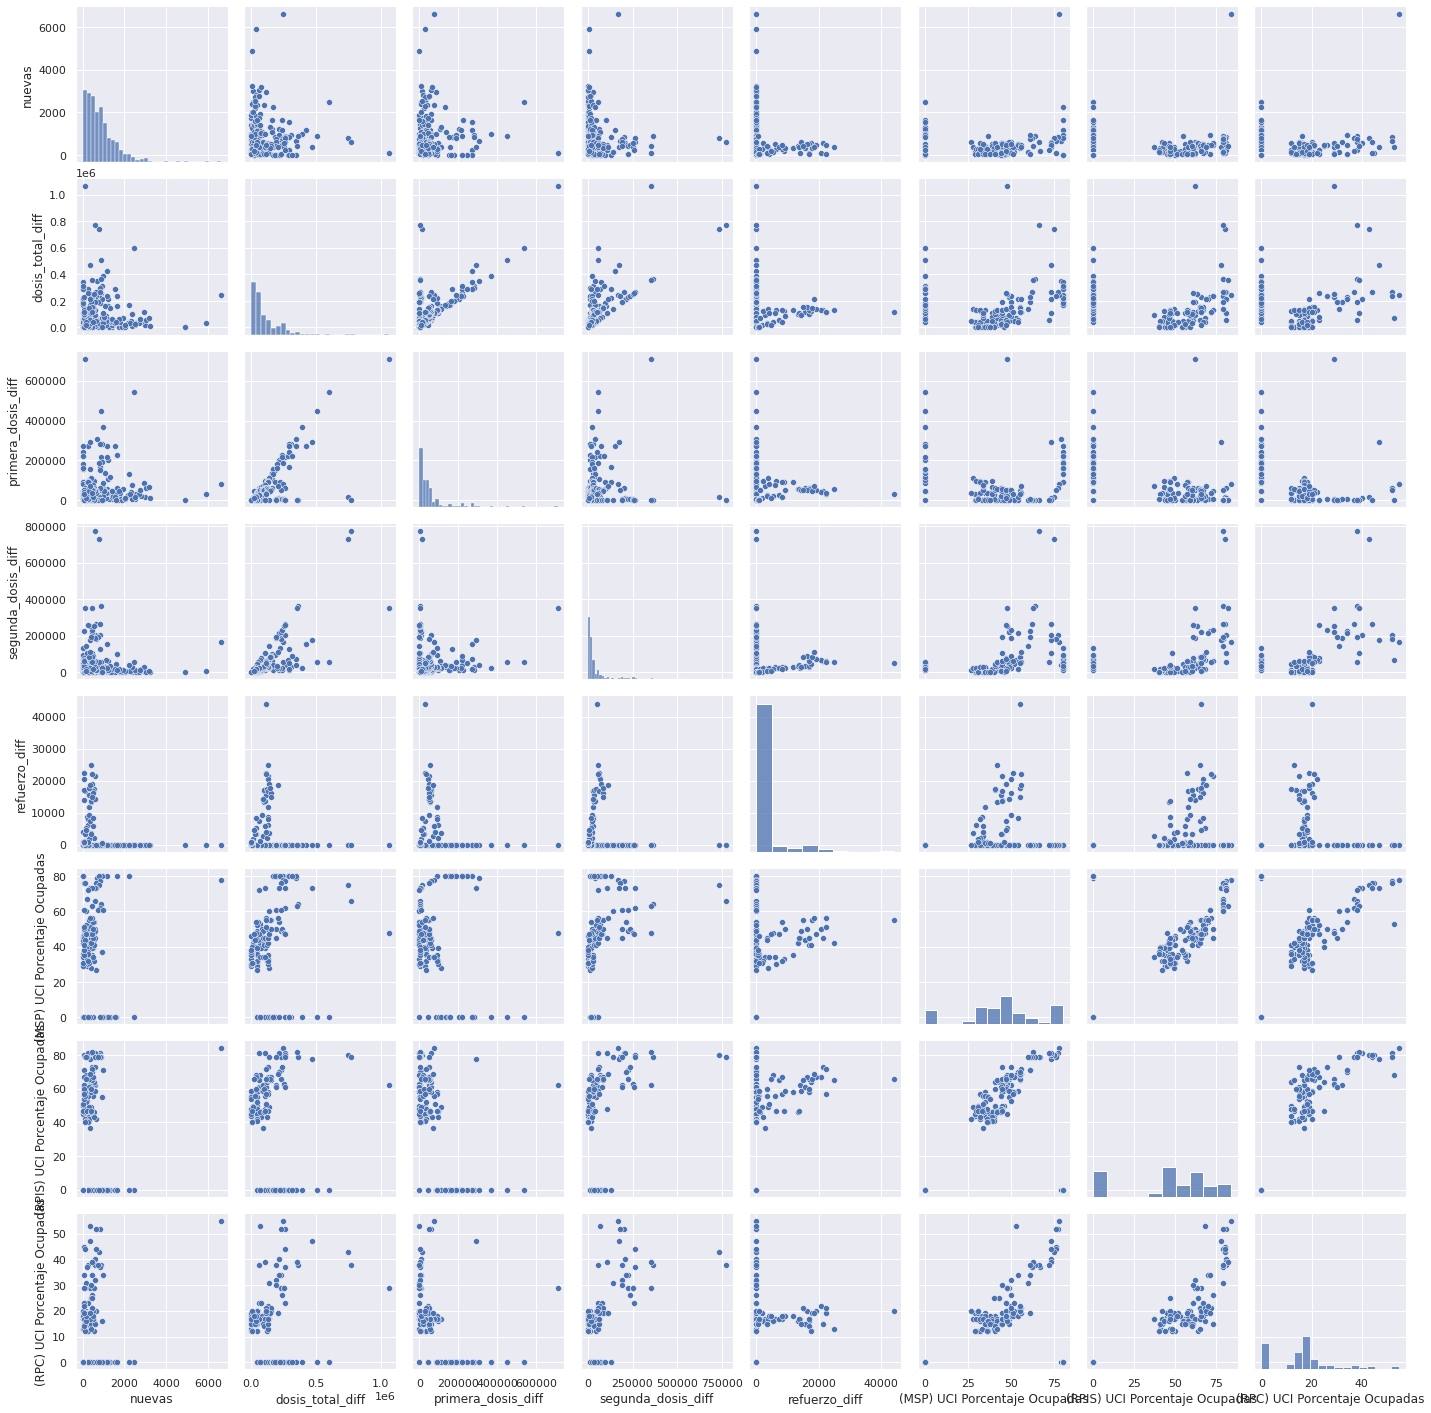

In [ ]:
sns.pairplot(df)

### Handling missing data

In [ ]:
df.reset_index().isnull().sum()

year                                0
day_of_year                         0
nuevas                              7
dosis_total_diff                  407
primera_dosis_diff                407
segunda_dosis_diff                407
refuerzo_diff                     407
(MSP) UCI Porcentaje Ocupadas     475
(RPIS) UCI Porcentaje Ocupadas    475
(RPC) UCI Porcentaje Ocupadas     475
dtype: int64

There's a lot of missing data. But it can be handled without dropping rows nor columns. Let's visualize missing data so as to have a better idea of this.

In [ ]:
import missingno as msno

<AxesSubplot:>

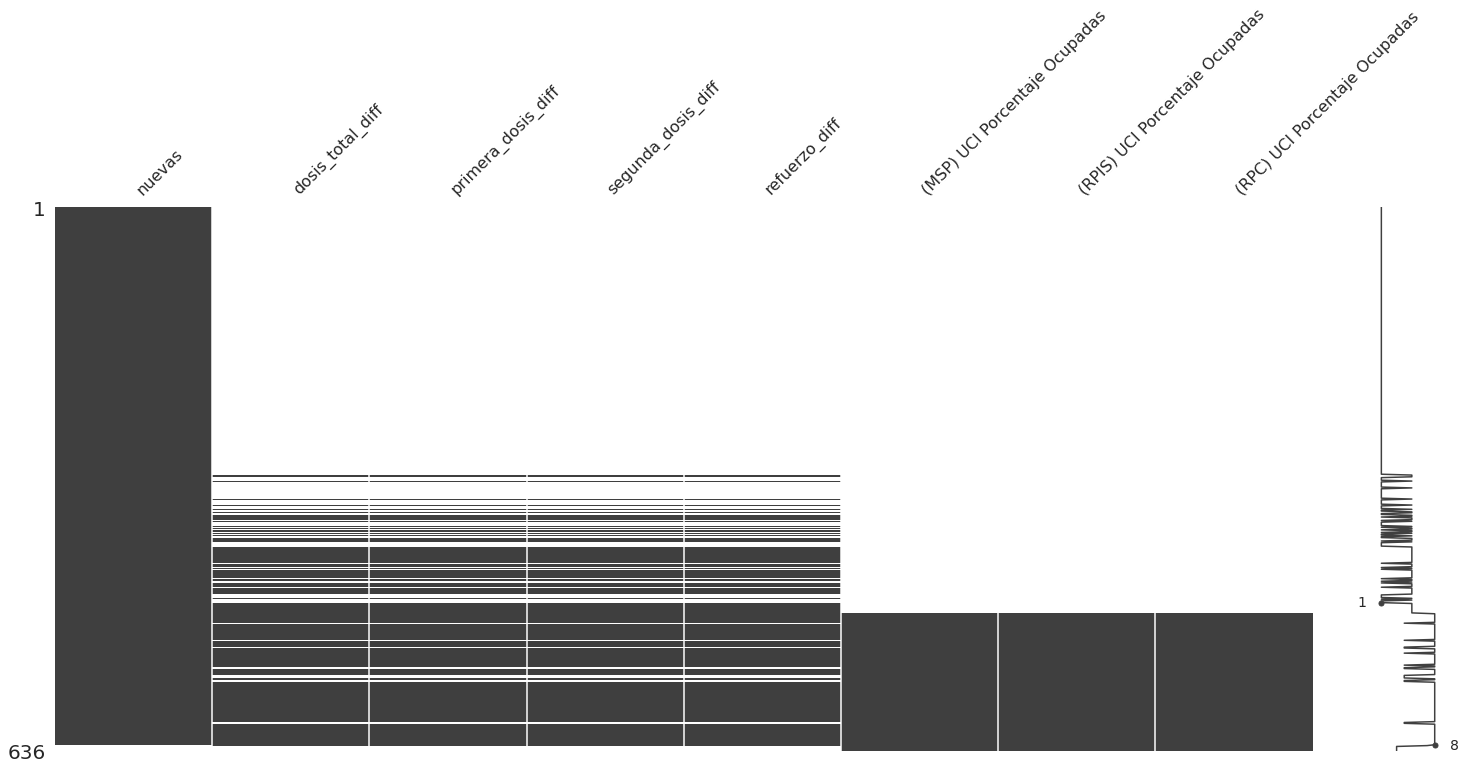

In [ ]:
msno.matrix(df)

<AxesSubplot:>

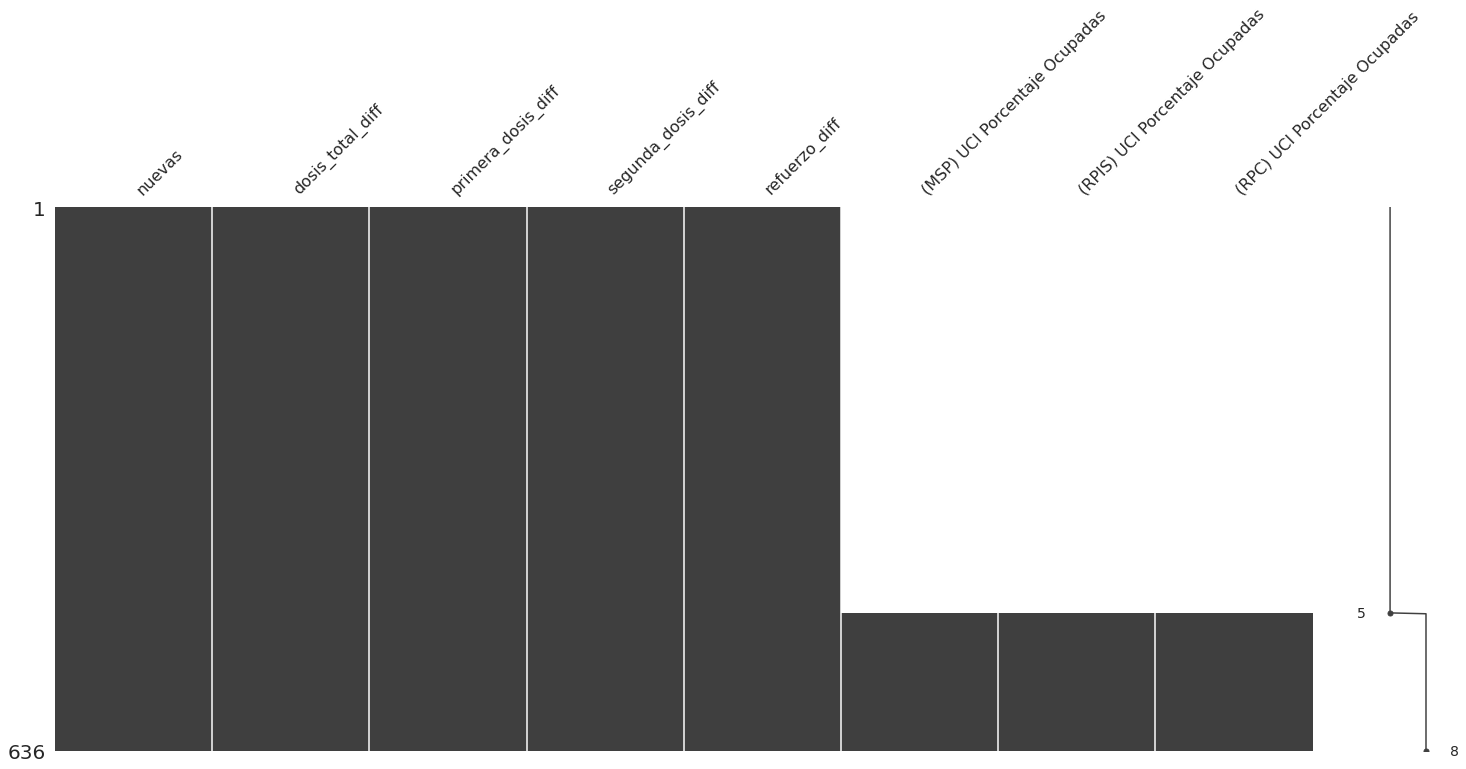

In [ ]:
msno.matrix(df)

Data imputation techniques: http://www.stat.columbia.edu/~gelman/arm/missing.pdf

As we can see there's a lot of missing data and this can bias our model. But, we can easily fill those gaps, but how? What criteria will we use?

* Doses missing data are 0. It's because there wasn't vaccines during those days.
* UCI capacity missing data are 100. There was a collapse of health system, but this data is not recorded here. Anyway, those values won't be replaced with 100, since we couldn't find a reliable source.
* For new infections I will use the median, so I won't bias this variable.


In [ ]:
df[['nuevas']] = df[['nuevas']].fillna(np.nanmedian(df.nuevas))

In [ ]:
df[['dosis_total_diff', 'primera_dosis_diff', 'segunda_dosis_diff', 'refuerzo_diff']] = df[['dosis_total_diff', 'primera_dosis_diff', 'segunda_dosis_diff', 'refuerzo_diff']].fillna(0)

<AxesSubplot:xlabel='year,day_of_year'>

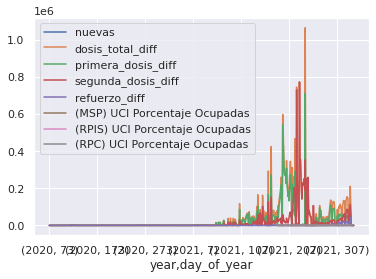

In [ ]:
df.plot()

### Export data

In [ ]:
df.to_csv('/work/covid-19_ecuador/data/interim/df_unified.csv', index=False)

In [ ]:
df_icu_unified = df.dropna()

In [ ]:
df_icu_unified.to_csv('/work/covid-19_ecuador/data/interim/df_icu_unified.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=298bb443-d8b3-4731-ae95-ca4418ea078f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>